***Team Assignment***

1. Neeraj Namani - 001616313
2. Anish Reddy Yellakonda - 001607588
3. Gayathri Srujana - 001615025

In [1]:
%pylab inline
import pandas as pd
from scipy import linalg
from itertools import combinations
import scipy

Populating the interactive namespace from numpy and matplotlib


# Homework 1
## Homework guideline

- This is a group homework. Your group only needs to submit one homework. You can form a group of 1, 2 or 3.


- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point.

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to.

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources. But you
must understand, write, and hand in your own answers. In addition, you must write and submit
your own code in the programming part of the assignment (we may run your code).
If you copy someone else homework solution, both of you may receive ZERO point.

- **Late assignments:** Recognizing that students may face unusual circumstances and require some flexibility in the course of the semester, each student will have a total of 7 free late (calendar) days to use as s/he sees fit, but no more than 4 late days can be used on any single assignment. Late days are counted at the granularity of days: e.g., 3 hours late is one late day.  

- **You must write your own code and fill in the your answer in the text box.** If you fail to do either of that, you will receive zero point.





---



---


# Tips on Pandas Dataframe
DataFrames are similar to Numpy arrays but more flexible;
unlike Numpy arrays, they store row and column indices along with the values of the data. Each column of
a DataFrame can also, in principle, store data of a different type. For this assignment, however, all data are
floats. Here are a few commands that will get you working with Pandas for this assignment:

|         |                                                       |
|---------|-------------------------------------------------------|
|df.head()    |# Print the first few lines of DataFrame df.                        |
|df.index  | # Get the row indices for df.                   |
|df.columns  |# Get the column indices.                                |
|df['foo']    | # Return the column named ‘foo’.                                              |
|df.drop(‘foo’, axis = 1)    |# Return all columns except ‘foo’.           |
|df.values    |# Return the values as a Numpy array.                           |
|df[‘foo’].values     |# Grab column foo and convert to Numpy array.                           |
|df.iloc[:3,:3]    |# Use numerical indices (like Numpy) to get 3 rows and cols.                            |

You may also refer to the following [cheat sheet](https://github.com/yexf308/MAT592/blob/main/Module0/pandas_cheat_sheet.pdf).

---



---



# Q1. Prostate Cancer (20pt)
**Background**: The data for this example come from a study by Stamey et al. (1989) that examined the correlation between the level of prostate specific antigen (PSA) and a number of clinical measures, in 97 men who were about to receive a radical prostatectomy.
The goal is to predict the log of PSA (lpsa) from a number of measurements.

Variables:

|         |                                                       |
|---------|-------------------------------------------------------|
|lpsa     |log prostate specific antigen                          |
|lcavol   |log cancer volume                                      |
|lweight  |log prostate weight                                    |
|age      |age                                                    |
|lbph     |log of benign prostatic hyperplasia amount             |
|svi      |seminal vesicle invasion                               |
|lcp      |log of capsular penetration                            |
|gleason  |Gleason score                                          |
|pgg45    |percent of Gleason scores 4 or 5                       |


The following code loads the the prostate cancer data set. You can see there are 8 features and 97 cases. We divide the dataset into two parts: the 67 cases as training set (in Xtrain and ytrain) and the 30 cases as test set (in Xtest and ytest).

In [2]:
from scipy.io import loadmat

!wget https://github.com/yexf308/MAT592/blob/main/homework/HW1/prostateStnd.mat?raw=true -O prostateStnd.mat
data = loadmat('prostateStnd.mat')
names = list(map(lambda x: x[0], data['names'][0]))
Xtrain, ytrain = data['Xtrain'], data['ytrain']
Xtest, ytest   = data['Xtest'], data['ytest']
print(names)
print(Xtrain.shape)
print(Xtest.shape)


--2024-09-19 01:18:14--  https://github.com/yexf308/MAT592/blob/main/homework/HW1/prostateStnd.mat?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/yexf308/MachineLearning/blob/main/homework/HW1/prostateStnd.mat?raw=true [following]
--2024-09-19 01:18:15--  https://github.com/yexf308/MachineLearning/blob/main/homework/HW1/prostateStnd.mat?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yexf308/MachineLearning/raw/refs/heads/main/homework/HW1/prostateStnd.mat [following]
--2024-09-19 01:18:15--  https://github.com/yexf308/MachineLearning/raw/refs/heads/main/homework/HW1/prostateStnd.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yexf308/



---


## Q1.1: Linear Regression (10pt)
The **Coefficient of Determination** is defined as follows,
$$ R^2= 1- \frac{\sum_{n=1}^N(\hat{y}^{(n)}-y^{(n)})^2}{\sum_{n=1}^N(\bar{y}-y^{(n)})^2}$$
where $\bar y = \frac{1}{N}\sum_{n=1}^N y^{(n)}$.

- Please write a function to calculate coefficient of determination.

- Please perform the linear regression with least squares and caclulate coefficient of determination.

- Use this model to calculate the MSE(mean squared error) on the test set. Do you think we have the overfitting issue?

In [3]:
# Q1.1: Your code starts here

def lstsq_solve(X,y):
    Xb = np.c_[np.ones((X.shape[0],1)),X]
    coefficients_vector, residuals, rank, singular_values = linalg.lstsq(Xb,y)
    return coefficients_vector

def Coefficient_of_Determination(true, predicted):
    residual_sum = np.sum((predicted - true)**2)
    total_sum = np.sum((np.mean(true) - true)**2)
    return 1 - (residual_sum/total_sum)

def predict(X,coefficients):
    Xb = np.c_[np.ones((X.shape[0],1)),X]
    return Xb.dot(coefficients)

coefficients = lstsq_solve(Xtrain,ytrain)
ytrain_predictions = predict(Xtrain,coefficients)
ytest_predictions = predict(Xtest,coefficients)
rsquared_training = Coefficient_of_Determination(ytrain,ytrain_predictions)
rsquared_testing = Coefficient_of_Determination(ytest,ytest_predictions)

def MSE(true,predicted):
    return np.mean((true - predicted)**2)

mse_training = MSE(ytrain,ytrain_predictions)
mse_testing = MSE(ytest,ytest_predictions)

print("Coefficient of Determination on Training:", rsquared_training)
print("Coefficient of Determination on Testing:", rsquared_testing)
print("Mean Squared Error on Training:", mse_training)
print("Mean Squared Error on Testing:", mse_testing)

Coefficient of Determination on Training: 0.6943711796768238
Coefficient of Determination on Testing: 0.441401494156054
Mean Squared Error on Training: 0.4391997680583343
Mean Squared Error on Testing: 0.5863291707988222


1. On observing the values of Mean Squared Error on both Training and Testing sets, the mean squared error of training is less compared to the mean squared error of testing data.
2. The linear model did not performed well on testing data compared to training data which leads to overfitting issue.




---


## Q1.2 Ridge Regression (10pt)
We will use the prostate cancer dataset again.
- Please perform the Ridge regression with the hold out. Use the MSE on the test data to find the optimal penalty parameter $\lambda^*$.

- Calculate coefficient of determination. Compare with the least square, do you have any improvement?

- Plot *regularization path*, the coefficients $w_i$ as a function of the parameter $1/\lambda$.


The Coefficient of Determination for Lambda = 0.001: 0.42440690309030615
The Mean Squared Error for Lambda = 0.001: 1.0514390318334368
The Coefficient of Determination for Lambda = 0.01: 0.42224923040511564
The Mean Squared Error for Lambda = 0.01: 1.0553804642295348
The Coefficient of Determination for Lambda = 0.1: 0.4142738843957855
The Mean Squared Error for Lambda = 0.1: 1.069949072038781
The Coefficient of Determination for Lambda = 1: 0.4065402260986445
The Mean Squared Error for Lambda = 1: 1.0840761875933864
The Coefficient of Determination for Lambda = 10: 0.21892857582434155
The Mean Squared Error for Lambda = 10: 1.4267874066545063
The Coefficient of Determination for Lambda = 100: -0.8649958261597883
The Mean Squared Error for Lambda = 100: 3.4067979903840007
The Coefficient of Determination for Lambda = 1000: -1.962473199861654
The Mean Squared Error for Lambda = 1000: 5.411565861054339
The Coefficient of Determination for Lambda = 10000: -2.379825547513449
The Mean Squar

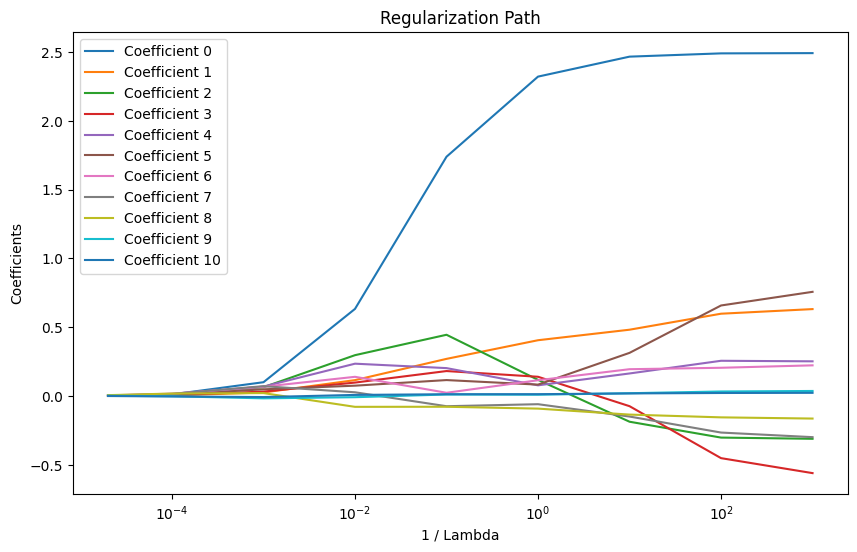

In [4]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=42)

def polynomial_features(data_matrix, poly_degree):
    number_of_samples = data_matrix.shape[0]
    polynomial_matrix = np.ones((number_of_samples, poly_degree + 1))
    for i in range(1, poly_degree + 1):
        polynomial_matrix[:, i] = data_matrix[:, 0] ** i
    return polynomial_matrix

polynomial_degree = 10
Xtrain_poly = polynomial_features(X_train, polynomial_degree)
Xtest_poly = polynomial_features(X_test, polynomial_degree)

def ridge_regression(features, target, lambdas):
    orthogonal_matrix, upper_triangular_matrix = np.linalg.qr(features)
    number_of_features = features.shape[1]
    regularization_matrix = lambdas * np.eye(number_of_features)
    weights_vector = np.linalg.solve(upper_triangular_matrix.T @ upper_triangular_matrix +
                                     regularization_matrix, upper_triangular_matrix.T @ orthogonal_matrix.T @
                                     target)
    return weights_vector


lambdas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 50000]
train_mse_list = []
test_mse_list = []
coefficients_list = []

def MSE(actual, predicted):
    return np.mean((actual - predicted) ** 2)

def Coefficient_of_Determination(actual, predicted):
    ss_total = np.sum((actual - np.mean(actual)) ** 2)
    ss_residual = np.sum((actual - predicted) ** 2)
    return 1 - (ss_residual / ss_total)

for lambda_value in lambdas:
    weights_vector = ridge_regression(Xtrain_poly, y_train, lambda_value)


    coefficients_list.append(weights_vector)

    ytrain_predictions = Xtrain_poly @ weights_vector
    ytest_predictions = Xtest_poly @ weights_vector

    train_mse_list.append(MSE(y_train, ytrain_predictions))
    test_mse_list.append(MSE(y_test, ytest_predictions))

    print(f"The Coefficient of Determination for Lambda = {lambda_value}: {Coefficient_of_Determination(y_test, ytest_predictions)}")
    print(f"The Mean Squared Error for Lambda = {lambda_value}: {MSE(y_test, ytest_predictions)}")


coefficients_array = np.array(coefficients_list)

plt.figure(figsize=(10, 6))
for i in range(coefficients_array.shape[1]):
    plt.plot(1/np.array(lambdas), coefficients_array[:, i], label=f'Coefficient {i}')

plt.xscale('log')
plt.xlabel('1 / Lambda')
plt.ylabel('Coefficients')
plt.title('Regularization Path')
plt.legend(loc='best')
plt.show()


1. After performing the ridge regression with hold out, I used MSE on test data to find the optimal penalty parameter. Based on the results, the lowest MSE I observed is for lambda = 0.001

2. The coefficient of determination for the best optimal penalty parameter lambda - 0.001 is 0.42440690309030615

3. Comparing with least squares, I see no improvement but the coefficient of determination for the two models are almost close to each other.



---

---

# Q2: Ridge Regression on MNIST dataset (40pt)

We will implement the Ridge Regression for the MNIST data set. The task
is to classify handwritten images of numbers between 0 to 9.

Each example has features $\mathbf{x}^{(i)}\in \mathbb{R}^d$ where $d=28\times 28=784$ and label $y^{(i)}\in \{0,\dots, 9\}$. Here we will ignore the intercept. We wish to learn a predictor $\hat{f}$ that takes as input a vector in $\mathbb{R}^d$ and output an index in $\{0, \dots, 9\}$. We define our training and testing classification error on a predictor $f$ as
\begin{align}
\ell_{\text{train}}(f) = \frac{1}{|D_{\text{train}}|}\sum_{(\mathbf{x}^{(i)}, y^{(i)})\in D_{\text{train}}} \mathbb{1}_{f(\mathbf{x}^{(i)})\ne y^{(i)}} \\
\ell_{\text{test}}(f) = \frac{1}{|D_{\text{test}}|}\sum_{(\mathbf{x}^{(i)}, y^{(i)})\in D_{\text{test}}} \mathbb{1}_{f(\mathbf{x}^{(i)})\ne y^{(i)}}
\end{align}

Do not standardize the data. Normally you would but our tests expect the original data.

In [5]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
# consider to make your training data set larger, maybe even to use the full training (60000).
# Normalize it by dividing 255.
Xtr                   = train_X/255
Ytr                   = train_y
Xte                   = test_X/255
Yte                   = test_y

print('Xtr: ' + str(Xtr.shape))
print('Ytr: ' + str(Ytr.shape))
print('Xte: '  + str(Xte.shape))
print('Yte: '  + str(Yte.shape))

Xtr: (60000, 28, 28)
Ytr: (60000,)
Xte: (10000, 28, 28)
Yte: (10000,)


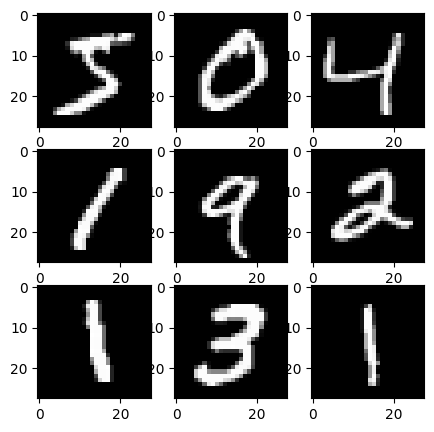

In [6]:
fig, axs = plt.subplots(3, 3,figsize=(5,5))
axs = axs.ravel()

for i in range(9):
    axs[i].imshow(Xtr[i], cmap=pyplot.get_cmap('gray'))

In [7]:
Ytr[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)



---


## Q2.1 Prepare data (5pt)
- Prepare your training matrix $\mathbf{X}$.

- We will use one-hot encoding of the labels, that is the original label $y\in\{0, \dots, 9\}$ is mapped to the standard basis vector $e_y$ where $e_y$ is a vector of all zeros except for a 1 in the $z$th position. Then label one-hot encoded in $\mathbf{y}\in \mathbb{R}^{1\times k}$, $k=10$. We can stack all $\mathbf{y}^{(i)}$ to be a matrix $\mathbf{Y}\in \mathbb{R}^{N\times k}$. Prepare your matrix $\mathbf{Y}$.

- Don't forget to do the same preparation for the testing data.





In [8]:
def one_hot(y, num_classes):
    """One hot encode a vector `y`.
    One hot encoding takes an array of integers and coverts them into binary format.
    Each number i is converted into a vector of zeros (of size num_classes), with exception of i^th element which is 1.

    Args:
        y (np.ndarray): An array of integers [0, num_classes), of shape (n,)
        num_classes (int): Number of classes in y.

    Returns:
        np.ndarray: Array of shape (n, num_classes).
        One-hot representation of y (see below for example).

    Example:
        ```python
        > one_hot([2, 3, 1, 0], 4)
        [
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [0, 1, 0, 0],
            [1, 0, 0, 0],
        ]
        ```
    """
    matrix_encode = np.zeros((y.shape[0], num_classes))
    matrix_encode[np.arange(y.shape[0]), y] = 1
    return matrix_encode


In [9]:
# your main function goes here.
Xtr_flatten = Xtr.reshape(Xtr.shape[0], -1)
Xte_flatten = Xte.reshape(Xte.shape[0], -1)

num_classes = 10
Ytr_one_hot = one_hot(Ytr, num_classes)
Yte_one_hot = one_hot(Yte, num_classes)

print("Training data shape (Xtr) : "+str(Xtr_flatten.shape))
print("Training label shape (Ytr) : "+str(Ytr_one_hot.shape))
print("Testing data shape (Xte) : "+str(Xte_flatten.shape))
print("Testing label shape (Yte) : "+str(Yte_one_hot.shape))

Training data shape (Xtr) : (60000, 784)
Training label shape (Ytr) : (60000, 10)
Testing data shape (Xte) : (10000, 784)
Testing label shape (Yte) : (10000, 10)




---


## Q2.2 Ridge regression (10pt)
We will choose a linear classifier to minimize the following objective
\begin{align}
\hat{\mathbf{W}}=\arg\min_{\mathbf{W}\in \mathbb{R}^{d\times k}}\|\mathbf{X}\mathbf{W}-\mathbf{Y}\|_2^2 +\lambda \|\mathbf{W}\|_F^2
\end{align}
where $\|\mathbf{W}\|_F$ is the Frobenius norm of $\mathbf{W}$, $\|\mathbf{W}\|_F^2 = \sum_{i=1}^d\sum_{j=1}^k \mathbf{W}_{ij}^2$. To predict a data point $\mathbf{x}^{(i)}$, the predicted $\hat{\mathbf{y}}^{(i)}= \mathbf{x}^{(i)}\hat{\mathbf{W}}$ and the predicted digit is the correspoding index has the largest value,
\begin{align}
\text{digit} = \arg\max_{j=0,\dots, 9} \hat{\mathbf{y}}^{(i)}_j
\end{align}

**Show** it has analytical solution,
\begin{align}
\hat{\mathbf{W}}= (\mathbf{X}^\top \mathbf{X}+\lambda \mathbf{I})^{-1}\mathbf{X}^\top\mathbf{Y}
\end{align}
Hint: If we just take $i$-th column of $\mathbf{Y}$, it will recover the ridge regression discussed in the lecture.




# Your solution:

The objective function is:


\begin{align}
J(\mathbf{W}) = \|\mathbf{X} \mathbf{W} - \mathbf{Y}\|_2^2 + \lambda \|\mathbf{W}\|_F^2
\end{align}


Expanding the terms:

  
  \begin{align}
  \|\mathbf{X} \mathbf{W} - \mathbf{Y}\|_2^2 = (\mathbf{X} \mathbf{W} - \mathbf{Y})^\top (\mathbf{X} \mathbf{W} - \mathbf{Y})
  \end{align}
  
  \begin{align}
  \lambda \|\mathbf{W}\|_F^2 = \lambda \sum_{i=1}^d \sum_{j=1}^k \mathbf{W}_{ij}^2 = \lambda \mathbf{W}^\top \mathbf{W}
  \end{align}

Now the objective function becomes


\begin{align}
J(\mathbf{W}) = (\mathbf{X} \mathbf{W} - \mathbf{Y})^\top (\mathbf{X} \mathbf{W} - \mathbf{Y}) + \lambda \mathbf{W}^\top \mathbf{W}
\end{align}


Expanding the first term:

\begin{align}
(\mathbf{X} \mathbf{W} - \mathbf{Y})^\top (\mathbf{X} \mathbf{W} - \mathbf{Y}) = \mathbf{W}^\top \mathbf{X}^\top \mathbf{X} \mathbf{W} - 2 \mathbf{W}^\top \mathbf{X}^\top \mathbf{Y} + \mathbf{Y}^\top \mathbf{Y}
\end{align}

\begin{align}
J(\mathbf{W}) = \mathbf{W}^\top \mathbf{X}^\top \mathbf{X} \mathbf{W} - 2 \mathbf{W}^\top \mathbf{X}^\top \mathbf{Y} + \mathbf{Y}^\top \mathbf{Y} + \lambda \mathbf{W}^\top \mathbf{W}
\end{align}


We now take the gradient of J(W) with respect to W:

\begin{align}
\frac{\partial J(\mathbf{W})}{\partial \mathbf{W}} = 2 \mathbf{X}^\top \mathbf{X} \mathbf{W} - 2 \mathbf{X}^\top \mathbf{Y} + 2 \lambda \mathbf{W}
\end{align}

Set the gradient equal to zero to minimize the objective,

\begin{align}
2 \mathbf{X}^\top \mathbf{X} \mathbf{W} - 2 \mathbf{X}^\top \mathbf{Y} + 2 \lambda \mathbf{W} = 0
\end{align}

\begin{align}
\mathbf{X}^\top \mathbf{X} \mathbf{W} + \lambda \mathbf{W} = \mathbf{X}^\top \mathbf{Y}
\end{align}

\begin{align}
(\mathbf{X}^\top \mathbf{X} + \lambda \mathbf{I}) \mathbf{W} = \mathbf{X}^\top \mathbf{Y}
\end{align}

\begin{align}
\hat{\mathbf{W}} = (\mathbf{X}^\top \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^\top \mathbf{Y}
\end{align}




---


## Q2.3 Implementation (10pt)
- Code a function `train` that takes as input $\mathbf{X}\in\mathbb{R}^{N\times d}, \mathbf{Y}\in \mathbb{R}^{N\times k}, \lambda>0$ and returns $\hat{\mathbf{W}}\in \mathbb{R}^{d\times k}$.

- Code a function `predict` that takes as input $\mathbf{W}\in \mathbb{R}^{d\times k}$, $\tilde{\mathbf{X}}\in\mathbb{R}^{M\times d} $ and returns an $M$-length vector with the $i$th entry equal to $\arg\max_{j=0,\dots, 9} \tilde{\mathbf{y}}^{(i)}_j$, where  $\tilde{\mathbf{y}}^{(i)}$ is the predicted value from the data point $\tilde{\mathbf{x}}^{(i)}$, which is $i$th row of $\tilde{\mathbf{X}}$.

- Train $\hat{\mathbf{W}}$ on MNIST training data with $\lambda=10^{-4}$ and make label predictions on the test data. What is the training and testing error? As a remark, it should be around 15\%.

In [10]:
# your code starts here
def train(X, y, lam):
    """Train function for the Ridge Regression problem.
    Should use observations (`X`), targets (`y`) and regularization parameter (`lambda`)
    to train a weight matrix $$\\hat{W}$$.


    Args:
        X (np.ndarray): observations represented as `(n, d)` matrix.
            n is number of observations, d is number of features.
        y (np.ndarray): targets represented as `(n, k)` matrix.
            n is number of observations, k is number of classes.
        lam (float): parameter for ridge regularization.

    Raises:
        NotImplementedError: When problem is not attempted.

    Returns:
        np.ndarray: weight matrix of shape `(d, k)`
            which minimizes Regularized Squared Error on `x` and `y` with hyperparameter `_lambda`.
    """
    d = X.shape[1]
    I = np.eye(d)
    return np.linalg.inv(X.T @ X + lam * I) @ X.T @ y

In [11]:
def predict(X, w):
    """Train function for the Ridge Regression problem.
    Should use observations (`X`), and weight matrix (`w`) to generate predicated class for each observation in X.

    Args:
        X (np.ndarray): observations represented as `(n, d)` matrix.
            n is number of observations, d is number of features.
        w (np.ndarray): weights represented as `(d, k)` matrix.
            d is number of features, k is number of classes.

    Raises:
        NotImplementedError: When problem is not attempted.

    Returns:
        np.ndarray: predictions matrix of shape `(n,)` or `(n, 1)`.
    """
    Y_pred = X @ w
    return np.argmax(Y_pred, axis=1)

In [12]:
# your main function goes here.

lambda_value = 1e-4
W = train(Xtr_flatten, Ytr_one_hot, lambda_value)
ytrain_pred = predict(Xtr_flatten, W)
ytest_pred = predict(Xte_flatten, W)

def classification_error(actual, predicted):
  return np.mean(actual != predicted)

train_error = classification_error(Ytr, ytrain_pred)
test_error = classification_error(Yte, ytest_pred)

print("The training error is: "+str(train_error*100))
print("The testing error is: "+str(test_error*100))

The training error is: 14.804999999999998
The testing error is: 14.66




---


## Q2.4 Improvement (10pt)
We just fit a classifier that was linear in the pixel intensities to the MNIST data. For
classification of digits the raw pixel values are very, very bad features: it’s pretty hard to separate
digits with linear functions in pixel space. The standard solution to this is to come up with some
transform $h: \mathbb{R}^d \rightarrow \mathbb{R}^p$ of the original pixel values such that the transformed points are (more easily)
linearly separable. This idea is very similar as SVM. In this problem, you’ll use the feature transform:
\begin{align}
h(\mathbf{x}) = \cos(\mathbf{G}\mathbf{x}+\mathbf{b})
\end{align}
where $\mathbf{G}\in \mathbb{R}^{p\times d}$ and $\mathbf{b}\in \mathbb{R}^p$ and the cosine function is applied elementwise. We will choose $\mathbf{G}$ to be a random matrix, with each entry sampled i.i.d. from a Gaussian distribution with mean $\mu=0$ and $\sigma^2=0.1$. And $\mathbf{b}$ is a random vector sampled i.i.d. from the uniform distribution on $[0,2\pi]$.

The
big question is: how do we choose the dimension $p$? **cross-validation!!** Note you don't need to perform $K$-fold cross-validation here.

- Randomly partition your training set into proportions 80/20 to use as a new training set and validation
set, respectively.

-  Using the `train` function you wrote above, train a $\hat{\mathbf{W}}^p$ for different values of $p$.

- plot the  training error and validation error on a single plot with $p$ on the $x$-axis.

Be
careful, your computer may run out of memory and slow to a crawl if $p$ is too large. As a remark, $p\le 6000$ should fit to colab. If you have trouble, you can start with $p=1000$.

You can use the same value of $\lambda$, which is $\lambda=10^{-4}$. But feel free to study the
effect of using different values of $\lambda$ and $\sigma^2$.

Do you improve your training/testing error?

p = 1000: Train Error = 0.05310416666666667, Validation Error = 0.8966666666666666
p = 2000: Train Error = 0.03295833333333333, Validation Error = 0.9295833333333333
p = 3000: Train Error = 0.024625, Validation Error = 0.93925
p = 4000: Train Error = 0.018270833333333333, Validation Error = 0.8805833333333334
p = 5000: Train Error = 0.014708333333333334, Validation Error = 0.8666666666666667
p = 6000: Train Error = 0.011333333333333334, Validation Error = 0.919


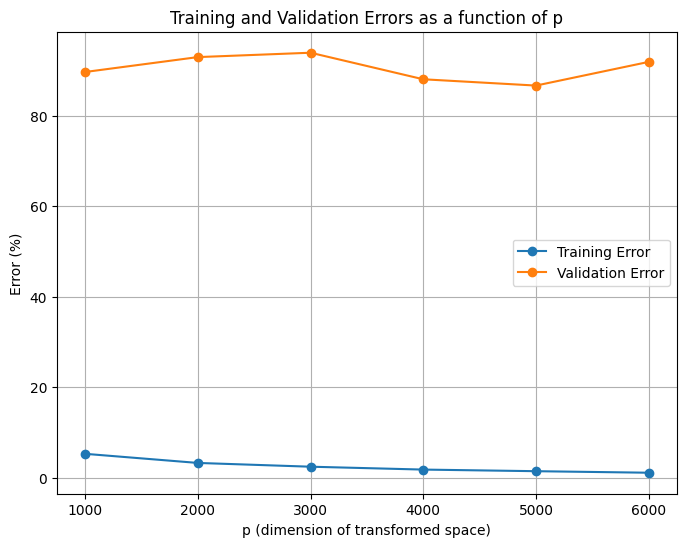

In [13]:
from sklearn.model_selection import train_test_split

def calculate_error(true_labels, predicted_labels):
  n = true_labels.shape[0]
  incorrect_predictions = np.sum(true_labels != predicted_labels)
  return incorrect_predictions / n

# Transform function: h(x) = cos(Gx + b)
def feature_transform(X, p):

    d = X.shape[1]
    G = np.random.normal(0, 0.1, (p, d))
    b = np.random.uniform(0, 2 * np.pi, p)
    return np.cos(X @ G.T + b)

X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(Xtr_flatten, Ytr_one_hot, test_size=0.2, random_state=42)

p_values = [1000, 2000, 3000, 4000, 5000, 6000]
train_errors = []
val_errors = []
lambda_reg = 1e-4

for p in p_values:
    # Applying feature transform
    X_train_transformed = feature_transform(X_train_split, p)
    X_val_transformed = feature_transform(X_val_split, p)

    # Training the model
    W_hat = train(X_train_transformed, Y_train_split, lambda_reg)

    # Predicting on training and validation sets
    train_preds = predict(X_train_transformed, W_hat)
    val_preds = predict(X_val_transformed, W_hat)

    true_train_labels = np.argmax(Y_train_split, axis=1)
    true_val_labels = np.argmax(Y_val_split, axis=1)

    train_error = calculate_error(true_train_labels, train_preds)
    val_error = calculate_error(true_val_labels, val_preds)

    train_errors.append(train_error)
    val_errors.append(val_error)

    print(f"p = {p}: Train Error = {train_error}, Validation Error = {val_error}")

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(p_values, np.array(train_errors) * 100, label='Training Error', marker='o')
plt.plot(p_values, np.array(val_errors) * 100, label='Validation Error', marker='o')
plt.xlabel('p (dimension of transformed space)')
plt.ylabel('Error (%)')
plt.title('Training and Validation Errors as a function of p')
plt.legend()
plt.grid(True)
plt.show()


1. I can see an improvement in training error but no improvement in testing error.
2. I also studied the effect of using different values for lambda and sigma, but there is no improvement seen in testing error.



---


## Q2.5 Confidence Interval (5pt)
Instead of reporting just the test error, which is an unbiased estimate of the true error, we
would like to report a confidence interval around the test error that contains the true error.

**Lemma**: (Hoeffding’s inequality) Fix $\delta\in(0,1)$, if for all $i=1,\dots, m$ we have that $X_i$ are i.i.d. random variables with $X_i\in [a,b]$ and $\mathbb{E}[X_i]=\mu$ then
\begin{align}
\mathbb{P}\left(\left|\left(\frac{1}{m}\sum_{i=1}^m X_i\right)-\mu\right|\ge \sqrt{\frac{(b-a)^2\log(2/\delta)}{2m}}\right)\le \delta
\end{align}

We will use the above equation to construct a confidence interval around the true classification error $\mathcal{E}(\hat f)= \mathbb{E}_{\text{test}}[\hat{\mathcal{E}}_{\text{test}}(\hat f)]$ since the test error $\hat{\mathcal{E}}_{\text{test}}(\hat f)$ is just the average of indicator variables taking values in $\{0,1\}$ corresponding to the $i$-th test example being classified correctly or not, respectively, where an error happens with probability $\mathcal{E}(\hat f)= \mathbb{E}_{\text{test}}[\hat{\mathcal{E}}_{\text{test}}(\hat f)]$ the true classification error.

Let $\hat p$ be the value of $p$ that approximately minimizes the validation error on the plot you just made
and use $\hat f(x) = \arg\max_j x^\top \hat{\mathbf{W}}^{\hat p}e_j$ to compute the classification test error $\hat{\mathcal{E}}_{\text{test}}(\hat f)$. Use Hoeffding’s
inequality, to compute a confidence interval of $\hat{\mathcal{E}}_{\text{test}}(\hat f)$ that contains the true classification error $\mathbb{E}_{\text{test}}[\hat{\mathcal{E}}_{\text{test}}(\hat f)]$ with probability at least 0.95 (i.e., $\delta=0.05$).   

Solve analytically

# Your solution:

The lemma for Hoeffding’s inequality is given by:
\begin{align}
\mathbb{P}\left( \left| \left( \frac{1}{m} \sum_{i=1}^m X_i \right) - \mu \right| \geq \sqrt{\frac{(b - a)^2 \log(2/\delta)}{2m}} \right) \leq \delta
\end{align}

We use Hoeffding’s inequality to bound the difference between the observed test error $\hat{\mathcal{E}}_{\text{test}}(\hat f)$ and the true error $\mathcal{E}(\hat f)$.

\begin{align}
\mathbb{P}\left( \left| \hat{\mathcal{E}}_{\text{test}}(\hat f) - \mathcal{E}(\hat f) \right| \geq \epsilon \right) \leq \delta
\end{align}

Where the margin of error $\epsilon$ is given by:
\begin{align}
\epsilon = \sqrt{\frac{\log(2/\delta)}{2m}}
\end{align}

The 95\% confidence interval for the test error is:
\begin{align}
\left[ \hat{\mathcal{E}}_{\text{test}}(\hat f) - \epsilon, \hat{\mathcal{E}}_{\text{test}}(\hat f) + \epsilon \right]
\end{align}

Where $\epsilon$ is:
\begin{align}
\epsilon = \sqrt{\frac{\log(40)}{2m}} \quad \text{(since \(\delta = 0.05\))}
\end{align}


$m = 10,000$. \\
$\hat{\mathcal{E}}_{\text{test}}(\hat f)$ is 0.10


   \begin{align}
   \epsilon = \sqrt{\frac{\log(40)}{2 \times 10,000}} = \sqrt{\frac{3.68888}{20,000}} \approx 0.01358
   \end{align}
**Confidence interval**:
   

   \begin{align}
   \left[ 0.10 - 0.01358, 0.10 + 0.01358 \right] = [0.08642, 0.11358]
   \end{align}

The true classification error lies between 8.64\% and 11.36\%.




---



---



# Q3: USA Crime data (40pt)

### Data Set Description
The following data consist of local crime statistics for 1994 US communities. We have split the dataset into a training and testing set with 1595 and 399 entries, respectively. We’d like to use
this training set to fit a model to predict the crime rate in new communities and evaluate model performance on
the test set. As there are a considerable number of input variables and fairly few training datapoints, overfitting
is a serious issue. In order to avoid this, use the **stochastic coordinate descent LASSO algorithm**.

The response $y$ is the rate of violent crimes
reported per capita in a community. The name of the response variable is `ViolentCrimesPerPop`, and it is held
in the first column of `df_train` and `df_test`. There are 95 features. These features include many variables.
Some features are the consequence of complex political processes. Others
are demographic characteristics of the community, including self-reported statistics about race, age, education,
and employment drawn from Census reports. You may read the documentation for the original version of this dataset: http://archive.ics.uci.edu/ml/datasets/communities+and+crime. For example, `PctYoungKids2Par` represents percent of kids 4 and under in two parent households (numeric - decimal).

 Note **the features have been standardized to have mean 0 and variance 1**.

The goals of this problem are twofold:
- Think deeply about models you might train and
how they might be misused.

- See how Lasso encourages sparsity of linear models in settings where
the feature set is very large relative to the number of training examples.

We emphasize that training a
model on this dataset can suggest a degree of correlation between a community’s demographics
and the rate at which a community experiences and reports violent crime. We strongly encourage
you to consider why these correlations may or may not hold more generally, whether correlations might
result from a common cause, and what issues can result in misinterpreting what a model can explain.


In [14]:
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW3/crime-train.txt?raw=true -O crime-train.txt
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW3/crime-test.txt?raw=true -O crime-test.txt

--2024-09-19 01:27:27--  https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW3/crime-train.txt?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 855572 (836K) [text/plain]
Saving to: ‘crime-train.txt’

crime-train.txt     100%[===================>] 835.52K  --.-KB/s    in 0.05s   

2024-09-19 01:27:27 (14.9 MB/s) - ‘crime-train.txt’ saved [855572/855572]

--2024-09-19 01:27:27--  https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW3/crime-test.txt?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [15]:
df_train = pd.read_table("crime-train.txt")
df_test = pd.read_table("crime-test.txt")

In [16]:
df_train.columns

Index(['ViolentCrimesPerPop', 'population', 'householdsize', 'agePct12t21',
       'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban',
       'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',
       'blackPerCap', 'indianPerCap', 'AsianPerCap', 'HispPerCap',
       'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad',
       'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
       'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce',
       'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam',
       'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
       'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig',
       'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10',
       'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10',
       'PctSpeakEnglOnly', 'PctNotSpe



---


## Q3.1: Stochastic coordinate descent LASSO algorithm (10pt)
In class, we introduce the coordinate descent LASSO algorithm in the round robin way. We can also pick the coordinate randomly.

**Algorithm:** To minimize function $\ell(\mathbf{w})$

Initialize $\hat{\mathbf{w}}=0$ or smartly
  - Precompute for all coordiate j
     $$ a_j = \mathbf{X}_j^\top \mathbf{X}_j $$
  - While not converged
   - Pick a coodinate j **uniformly at random**, compute

     \begin{align}
     & c_j = \mathbf{X}_j^\top (\mathbf{y}-\mathbf{X}_{-j}\mathbf{w}_{-j}) \\
     & \hat{w}_j = \text{SoftThreshold}\left(\frac{c_j}{a_j},\frac{\lambda}{a_j}\right)
     \end{align}

Modify the LASSO code in class to stochastic coordinate descent LASSO algorithm.      

In [17]:
# Q3.1: Your code starts here
X = df_train.drop('ViolentCrimesPerPop', axis=1)
y = df_train['ViolentCrimesPerPop']
# print(X.shape, y.shape)

X_test = df_test.drop('ViolentCrimesPerPop', axis=1)
y_test = df_test['ViolentCrimesPerPop']

#X.shape, y.shape, X_test.shape, y_test.shape

In [18]:

def soft_threshold(rho, lam):
    """Soft thresholding operator."""
    if rho < -lam:
        return rho + lam
    elif rho > lam:
        return rho - lam
    else:
        return 0

def stochastic_lasso(X, y, lam, tol=1e-6, max_iter=10000):
    d = X.shape[1]
    n = X.shape[0]
    w_s = np.zeros(d)

    a = np.sum(X ** 2, axis=0)
    residual = y.copy()

    c = np.dot(X.T, residual)

    for iteration in range(max_iter):
        w_pre = w_s.copy()

        # Pick a coordinate j uniformly at random
        j = np.random.randint(0, d)

        w_new = soft_threshold(c[j] / a[j], lam / a[j])

        if w_s[j] != w_new:
            delta_w = w_s[j] - w_new
            residual += delta_w * X[:, j]
            c += delta_w * X.T @ X[:, j]
            w_s[j] = w_new

        print(f"Iteration {iteration + 1}:")
        print(f"  Picked coordinate j = {j}")
        print(f"  Updated coefficient w[{j}] = {w_s[j]}")
        print(f"  Change in weights = {np.linalg.norm(w_s - w_pre, ord=1)}")

        # Convergence
        if np.linalg.norm(w_s - w_pre, ord=1) < tol:
            print(f"Converged after {iteration + 1} iterations.")
            break

    return w_s


stochastic_lasso(X.values, y.values, 1e-4)

Streaming output truncated to the last 5000 lines.
Iteration 8751:
  Picked coordinate j = 72
  Updated coefficient w[72] = 0.02140312757967585
  Change in weights = 0.013189653567417949
Iteration 8752:
  Picked coordinate j = 4
  Updated coefficient w[4] = 0.03149827489582596
  Change in weights = 0.0562781294301867
Iteration 8753:
  Picked coordinate j = 59
  Updated coefficient w[59] = -0.004653396066653282
  Change in weights = 0.0011689158007041891
Iteration 8754:
  Picked coordinate j = 3
  Updated coefficient w[3] = -0.019237323068828173
  Change in weights = 0.007524270341982726
Iteration 8755:
  Picked coordinate j = 25
  Updated coefficient w[25] = 0.02295540630315088
  Change in weights = 0.007198205444975882
Iteration 8756:
  Picked coordinate j = 61
  Updated coefficient w[61] = 0.011350452778107584
  Change in weights = 0.043231623017898624
Iteration 8757:
  Picked coordinate j = 16
  Updated coefficient w[16] = 0.010463292912382295
  Change in weights = 0.010660590012659

array([ 0.00950878,  0.03851397, -0.0161111 , -0.04406982,  0.00196688,
       -0.02461806,  0.01530519,  0.00142549,  0.00293954, -0.00672321,
       -0.006148  , -0.00064921, -0.04017419,  0.03045624,  0.01214439,
       -0.00786968,  0.01836134,  0.01628089, -0.01031712,  0.0077389 ,
       -0.01204876,  0.01307157,  0.00140112, -0.01747648,  0.00707491,
       -0.00217112, -0.03496675,  0.01083173, -0.01603943, -0.00829955,
        0.01150689, -0.01730009, -0.00539846,  0.00590424,  0.02342249,
        0.03800343, -0.01342489, -0.00020214,  0.00796583, -0.03499902,
       -0.01178457,  0.0010843 ,  0.02408614,  0.02099489, -0.03406289,
        0.02271828, -0.00895454, -0.00586834, -0.00361499, -0.00784397,
       -0.00296314, -0.02035407,  0.02258842, -0.01051295,  0.02371684,
        0.01346969,  0.01241971,  0.00641676,  0.00799803, -0.0002264 ,
       -0.03037339, -0.00601937, -0.03970087, -0.01086529,  0.03316407,
        0.00452958,  0.00890407,  0.00334762, -0.00636891,  0.01



---


## Q3.2  Efficient LASSO Algorithm (10pt)
In fact, the current code is not efficient since it recalculate the same thing again and again in each iteration, which waste a lot of computational power. Please optimize your code, particularly in calculating `c_j` and `update`. Make sure test the correctness and efficiency in your new code.

In [19]:
# Q3.2: Your code starts here

def optimized_stochastic_lasso(X, y, lam, tol=1e-6, max_iter=10000):


    d = X.shape[1]


    w_s = np.zeros(d)


    a = np.zeros(d)
    for j in range(d):
        a[j] = np.dot(X[:, j], X[:, j])

    residual = y.copy()

    for iteration in range(max_iter):
        w_pre = w_s.copy()

        # Pick a coordinate j uniformly at random
        j = np.random.randint(0, d)


        c_j = np.dot(X[:, j], residual) + w_s[j] * a[j]

        w_new = soft_threshold(c_j / a[j], lam / a[j])

        if w_s[j] != w_new:
            residual += (w_s[j] - w_new) * X[:, j]
            w_s[j] = w_new

        print(f"Iteration {iteration + 1}:")
        print(f"  Picked coordinate j = {j}")
        print(f"  Updated coefficient w[{j}] = {w_s[j]}")
        print(f"  Change in weights = {np.linalg.norm(w_s - w_pre, ord=1)}")

        # Convergence
        if np.linalg.norm(w_s - w_pre, ord=1) < tol:
            print(f"Converged after {iteration + 1} iterations.")
            break

    return w_s

optimized_stochastic_lasso(X.values, y.values, 1e-4)


Iteration 1:
  Picked coordinate j = 36
  Updated coefficient w[36] = 0.1304133278820519
  Change in weights = 0.1304133278820519
Iteration 2:
  Picked coordinate j = 84
  Updated coefficient w[84] = 0.05653614110608529
  Change in weights = 0.05653614110608529
Iteration 3:
  Picked coordinate j = 3
  Updated coefficient w[3] = 0.027007940253334233
  Change in weights = 0.027007940253334233
Iteration 4:
  Picked coordinate j = 65
  Updated coefficient w[65] = -0.014940249908547667
  Change in weights = 0.014940249908547667
Iteration 5:
  Picked coordinate j = 41
  Updated coefficient w[41] = -0.03521898526056307
  Change in weights = 0.03521898526056307
Iteration 6:
  Picked coordinate j = 59
  Updated coefficient w[59] = 0.05595868947367956
  Change in weights = 0.05595868947367956
Iteration 7:
  Picked coordinate j = 45
  Updated coefficient w[45] = 0.04701710188014156
  Change in weights = 0.04701710188014156
Iteration 8:
  Picked coordinate j = 21
  Updated coefficient w[21] = 0.02

array([-0.01990238,  0.        ,  0.        ,  0.02700794,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.01113728,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.02447588,  0.        ,  0.00592798,  0.        ,
        0.        ,  0.        ,  0.01120726,  0.        ,  0.        ,
        0.0185613 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.13041333,  0.        ,  0.        , -0.00247157,
        0.        , -0.03521899,  0.        ,  0.        ,  0.        ,
        0.0470171 ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.01419883,  0.        ,  0.        ,  0.00394846,  0.00401986,
        0.        ,  0.        ,  0.        ,  0.        ,  0.05595869,
        0.        ,  0.00469358,  0.        ,  0.        ,  0.        ,
       -0.01494025,  0.        ,  0.        ,  0.        ,  0.  



---


## Q3.3: Training (20pt)
- We will run the LASSO solver with $\lambda=\lambda_{\max}$ defined above.
- For the initial weights, just use 0. Then, cut
$\lambda$ down by a factor of 2 and run again, but this time pass in the values of $\hat{\mathbf w}$ from your $\lambda=\lambda_{\max}$ solution as
your initial weights. This is faster than initializing with 0 weights each time.(You need to modify LASSO function accordingly, e.g., you can let initial weights as your input.)

- Continue the process of cutting $\lambda$ by a factor of 2 until the smallest value of $\lambda$ is less than 0.01. Define “converging” as the change in any coefficient between one iteration and the next is no larger than $10^{-6}$.



For all plots use a log-scale for $\lambda$. You use `plt.xscale('log')`.
- Plot the number of nonzeros of each solution versus $\lambda$.

- Plot the regularization paths (in one plot) for the coefficients for input features `agePct12t29`,
`pctWSocSec`, `pctUrban`, `agePct65up`, and `householdsize`.

- On one plot, plot the squared error on the training and test data versus $\lambda$.

- Sometimes a larger value of $\lambda$ performs nearly as well as a smaller value, but a larger value will
select fewer variables and perhaps be more interpretable. Inspect the weights (on features) for $\lambda=30$.
Which feature variable had the largest (most positive) Lasso coefficient? What about the most negative?
Discuss briefly.


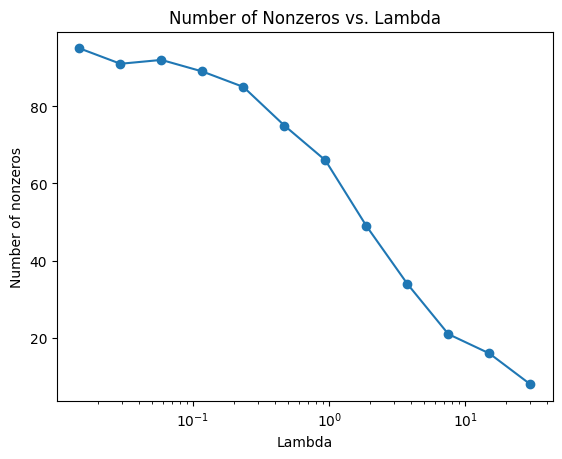

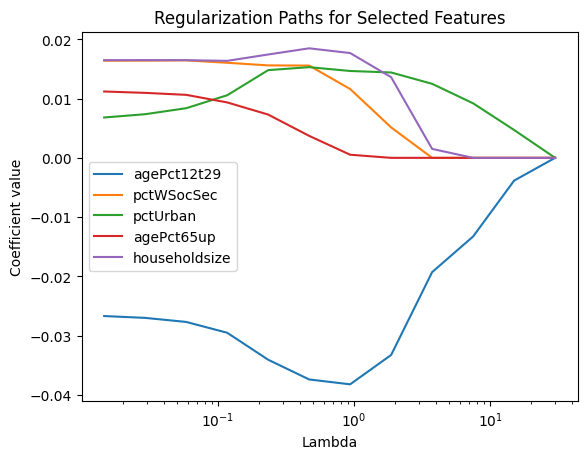

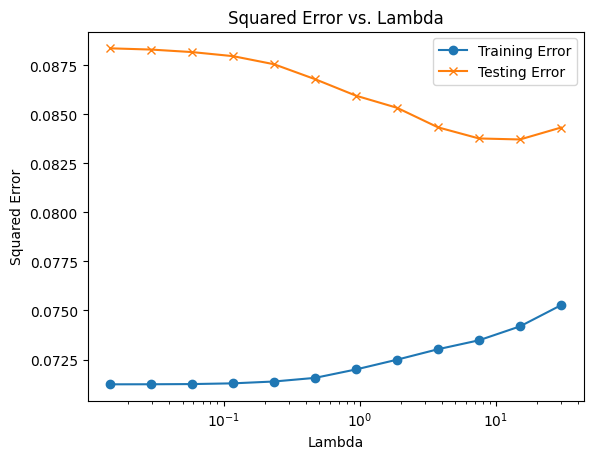

Feature with largest positive coefficient at lambda=30: PctIlleg
Feature with largest negative coefficient at lambda=30: PctKids2Par


In [20]:
# Q3.3: Your code starts here

def lasso_solver(X, y, lam, w_init=None, tol=1e-6, max_iter=10000):

    d = X.shape[1]
    if w_init is None:
        w = np.zeros(d)
    else:
        w = w_init.copy()


    a = np.sum(X ** 2, axis=0)

    residual = y - np.dot(X, w)

    for iteration in range(max_iter):
        w_pre = w.copy()

        for j in range(d):

            c_j = np.dot(X[:, j], residual) + w[j] * a[j]

            w_new = soft_threshold(c_j / a[j], lam / a[j])

            if w[j] != w_new:
                residual += (w[j] - w_new) * X[:, j]
                w[j] = w_new

        if np.max(np.abs(w - w_pre)) < tol:
            break

    return w

def train_lasso_path(X_train, y_train, X_test, y_test, lambdas):
    n_lambdas = len(lambdas)

    w_init = None
    nonzeros = []
    train_errors = []
    test_errors = []
    all_coefs = []

    for lam in lambdas:
        w = lasso_solver(X_train, y_train, lam, w_init=w_init)
        w_init = w.copy()

        nonzeros.append(np.sum(w != 0))

        all_coefs.append(w)

        train_error = np.mean((y_train - np.dot(X_train, w)) ** 2)
        test_error = np.mean((y_test - np.dot(X_test, w)) ** 2)
        train_errors.append(train_error)
        test_errors.append(test_error)

    return nonzeros, train_errors, test_errors, np.array(all_coefs)


lambda_max = 30
lambdas = [lambda_max / (2 ** i) for i in range(int(np.log2(lambda_max / 0.01)) + 1)]


nonzeros, train_errors, test_errors, all_coefs = train_lasso_path(X.values, y.values, X_test, y_test, lambdas)

# Plot 1: Number of nonzeros vs. lambda
plt.figure()
plt.plot(lambdas, nonzeros, marker='o')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Number of nonzeros')
plt.title('Number of Nonzeros vs. Lambda')
plt.show()

# Plot 2: Regularization paths for selected features
selected_features = ['agePct12t29', 'pctWSocSec', 'pctUrban', 'agePct65up', 'householdsize']
feature_indices = [X.columns.get_loc(f) for f in selected_features]  # Get indices of selected features

plt.figure()
for idx in feature_indices:
    plt.plot(lambdas, all_coefs[:, idx], label=X.columns[idx])

plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficient value')
plt.title('Regularization Paths for Selected Features')
plt.legend()
plt.show()

# Plot 3: Squared error on training and test data vs. lambda
plt.figure()
plt.plot(lambdas, train_errors, label='Training Error', marker='o')
plt.plot(lambdas, test_errors, label='Testing Error', marker='x')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Squared Error')
plt.title('Squared Error vs. Lambda')
plt.legend()
plt.show()

# Feature inspection for lambda=30
lambda_30_idx = lambdas.index(30)
weights_lambda_30 = all_coefs[lambda_30_idx]

largest_positive_feature = X.columns[np.argmax(weights_lambda_30)]
largest_negative_feature = X.columns[np.argmin(weights_lambda_30)]

print(f"Feature with largest positive coefficient at lambda=30: {largest_positive_feature}")
print(f"Feature with largest negative coefficient at lambda=30: {largest_negative_feature}")


# Your Solution:

1. The number of nonzero coefficients drops from around 90 to close to 0 as λ increases from small values to bigger ones.

2. In regularization path plot, As λ decreases, we can see that the coefficients start to grow large implying that those features are important in explaining the variance in the output variable. As λ increases, the coefficients are shrunk, means the model is regularized.
